In [3]:
import numpy as np
import scipy.stats

import matplotlib.pyplot as plt

import seaborn
%matplotlib inline

from tqdm import tqdm

In [4]:
class EGreedyMAB:
    
    def __init__(self, epsilon=.1):
        self.arm_feedback = {}
        self.arm_plays = {}
        self.arm_mean_payoff = {}
        self.epsilon = epsilon
        
        
    def get_decision(self,arm_id_list, arm_feature_list):
        np.random.shuffle(arm_id_list)
        current_averages = {id: self.arm_mean_payoff.get(id,100) for id in arm_id_list}
        
        if np.random.rand() < self.epsilon:
            return np.random.choice(arm_id_list)
        else:
            return max(current_averages, key=current_averages.get)
    
    def update(self, arm_id, reward):
        self.arm_feedback[arm_id] = self.arm_feedback.get(arm_id,0) + reward
        self.arm_plays[arm_id] = self.arm_plays.get(arm_id,0) + 1.0
        self.arm_mean_payoff[arm_id] = self.arm_feedback[arm_id] / self.arm_plays[arm_id]

In [5]:
class SimpleSimulator:
    
    def __init__(self,n_arms,loc_value, scale_value):
        self.arm_probs = {}
        for i in range(0, n_arms):
            self.arm_probs[i] = np.random.normal(loc=loc_value, scale = scale_value, size = None)
    
    def get_available_arms(self):
        return self.arm_probs.keys(), []
    
    def get_reward(self, arm_id):
        return scipy.stats.bernoulli.rvs(self.arm_probs.get(arm_id,0)   )
    

In [6]:
s1 = SimpleSimulator(10,4,2)
s2 = SimpleSimulator(5,3, 4)

In [7]:
s1.arm_probs

{0: 5.93865038270056,
 1: 5.35626383525776,
 2: 4.620362663743768,
 3: 6.2667043787949375,
 4: 6.021303790326301,
 5: 4.230747834970229,
 6: 3.434366661991488,
 7: 7.347110807565551,
 8: 4.75849112891031,
 9: 4.307947295250264}

In [8]:
s2.arm_probs

{0: 2.464869660630745,
 1: 6.475668809334134,
 2: 1.8292736113320311,
 3: 2.8188824925787412,
 4: -2.316950733403475}

In [46]:
TIME_STEPS = 50000
N_ARMS = 500
# Arms, Mean, Standard Deviation
sim = SimpleSimulator(N_ARMS, .5, .1)

mab = EGreedyMAB()
reward_list = []
played = [0 for i in range(N_ARMS)]

for t in tqdm(np.arange(TIME_STEPS)):
    arms, arm_features = sim.get_available_arms()
    arm_to_play = mab.get_decision(arms, arm_features)
    
    played[arm_to_play] += 1
     
    reward = sim.get_reward(arm_to_play)
    mab.update(arm_to_play, reward)
    
    reward_list.append(reward)

    

print 'total_reward', np.sum(reward_list)
print 'average_reward', np.mean(reward_list)


max_payoff = max(sim.arm_probs.values())
print 'best possible', max_payoff 


100%|██████████| 50000/50000 [00:13<00:00, 3674.60it/s]

total_reward 38040
average_reward 0.7608
best possible 0.799048893968


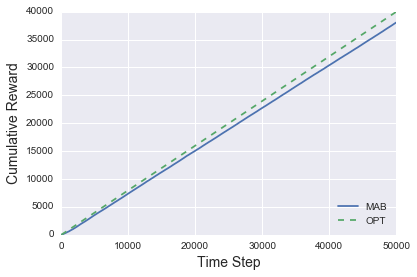

In [47]:
max_payoff = max(sim.arm_probs.values())

plt.plot(np.arange(len(reward_list)), np.cumsum(reward_list), label='MAB')

plt.plot(np.arange(TIME_STEPS), np.cumsum([max_payoff]*TIME_STEPS), label='OPT', ls='--')

plt.legend(loc='lower right')

plt.xlabel("Time Step", fontsize=14)

plt.ylabel("Cumulative Reward", fontsize=14)


In [48]:
np.random.rand()

0.6735790422225574

In [49]:
#plt.hist(sim.arm_probs.values(), 200,None)

326 -> 43304


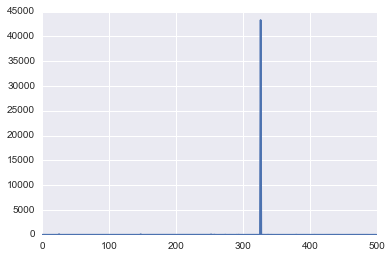

In [54]:
x = range(N_ARMS)
y = played
plt.plot(x,y)
#print played
big = max(played) 
print played.index(big), "->", big